<a href="https://colab.research.google.com/github/JOAOPEDRO2018/Jp_DataScience/blob/master/%C3%81rvore_de_decis%C3%A3o_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Árvore de decisão Covid-19**

**Código feito com base na aula 3 de árvore de decisão do [curso de IA para todos](https://youtu.be/ecYpXd4WREk?list=PLtQM10PgmGogjn0cikgWi8wpQUnV6ERkY).**

In [ ]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from IPython.display import Image

In [ ]:
df = pd.read_csv("dataset_einstein.csv", delimiter=';')
df.head()

,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
0,44477f75e8169d2,13,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
1,126e9dd13932f68,17,negative,0,0,0,-0.02234,-0.09461,-0.223767,-0.147895,2.089928
2,a46b4402a0e5696,8,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
3,f7d619a94f97c45,5,negative,0,0,0,NaN,NaN,NaN,NaN,NaN
4,d9e41465789c2b5,15,negative,0,0,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Verificando a quantidade de linhas e colunas
row = df.shape[1]
column = df.shape[0]
print("Numero de colunas: ",row)
print("Numero de linhas: ", column)

Numero de colunas:  11
Numero de linhas:  5644


Vamos excluir as todas as linhas que possuem ao menos uma linha com valor *missing*.

Após a exclusão podemos perceber que o número de linhas decai estrondosamente de 5644 para 357 linhas

In [ ]:
df = df.dropna(axis=0, how="any")

In [ ]:
new_row = df.shape[1]
new_column = df.shape[0]
print("Numero de colunas: ",new_row)
print("Numero de linhas: ", new_column)
df.head() 

Numero de colunas:  11
Numero de linhas:  357


,Patient ID,Patient age quantile,SARS-Cov-2 exam result,Patient addmited to regular ward (1=yes. 0=no),Patient addmited to semi-intensive unit (1=yes. 0=no),Patient addmited to intensive care unit (1=yes. 0=no),Hemoglobin,Leukocytes,Basophils,Proteina C reativa mg/dL,Creatinine
1,126e9dd13932f68,17,negative,0,0,0,-0.022340,-0.094610,-0.223767,-0.147895,2.089928
8,8bb9d64f0215244,1,negative,0,1,0,-0.774212,0.364550,-0.223767,-0.286986,-1.838623
28,fc41531ca4faf1e,13,negative,0,0,0,0.854844,-0.075131,2.525365,-0.434025,-0.701411
29,891d0f6449ff3d7,14,negative,0,0,0,0.854844,0.105751,-0.529226,-0.529401,0.332418
30,ebdd7c67fcb21b4,9,negative,1,0,0,-0.711556,-0.286623,-0.223767,0.545572,1.021638


In [ ]:
print("Total de casos negativos",df[df["SARS-Cov-2 exam result"]=="negative"].shape[0])
print("Total de casos positivos",df[df["SARS-Cov-2 exam result"]=="positive"].shape[0])

Total de casos negativos 302
Total de casos positivos 55


In [ ]:
Y = df["SARS-Cov-2 exam result"].values
X = df[['Leukocytes', 'Hemoglobin', 'Basophils', 'Creatinine', 'Proteina C reativa mg/dL']].values

print("Resultados\n", Y)
print("Features\n", X)

Resultados
 ['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'positive' 'nega

Dividindo o dataset em dados de treino e teste.

Os dados de treino serão usados pelo python para treinar o modelo, para depois testar nos dados de teste se ele conseguiu predizer corretamente

In [ ]:
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X,Y, test_size=0.2, random_state=3)

In [ ]:
#DecisionTreeClassifier serve para criar uma árvore de decisão
algoritmo_arvore = DecisionTreeClassifier(criterion="entropy", max_depth=5)
#agora vamos usar esse algoritmo para treinar um modelo
modelo = algoritmo_arvore.fit(X_treino, Y_treino)

In [ ]:
print(modelo.feature_importances_)

[0.52018613 0.13330337 0.16054866 0.03336216 0.15259968]


Com código abaixo vamos poder ver uma ilustração de como funciona o modelo da árvore de decisão.

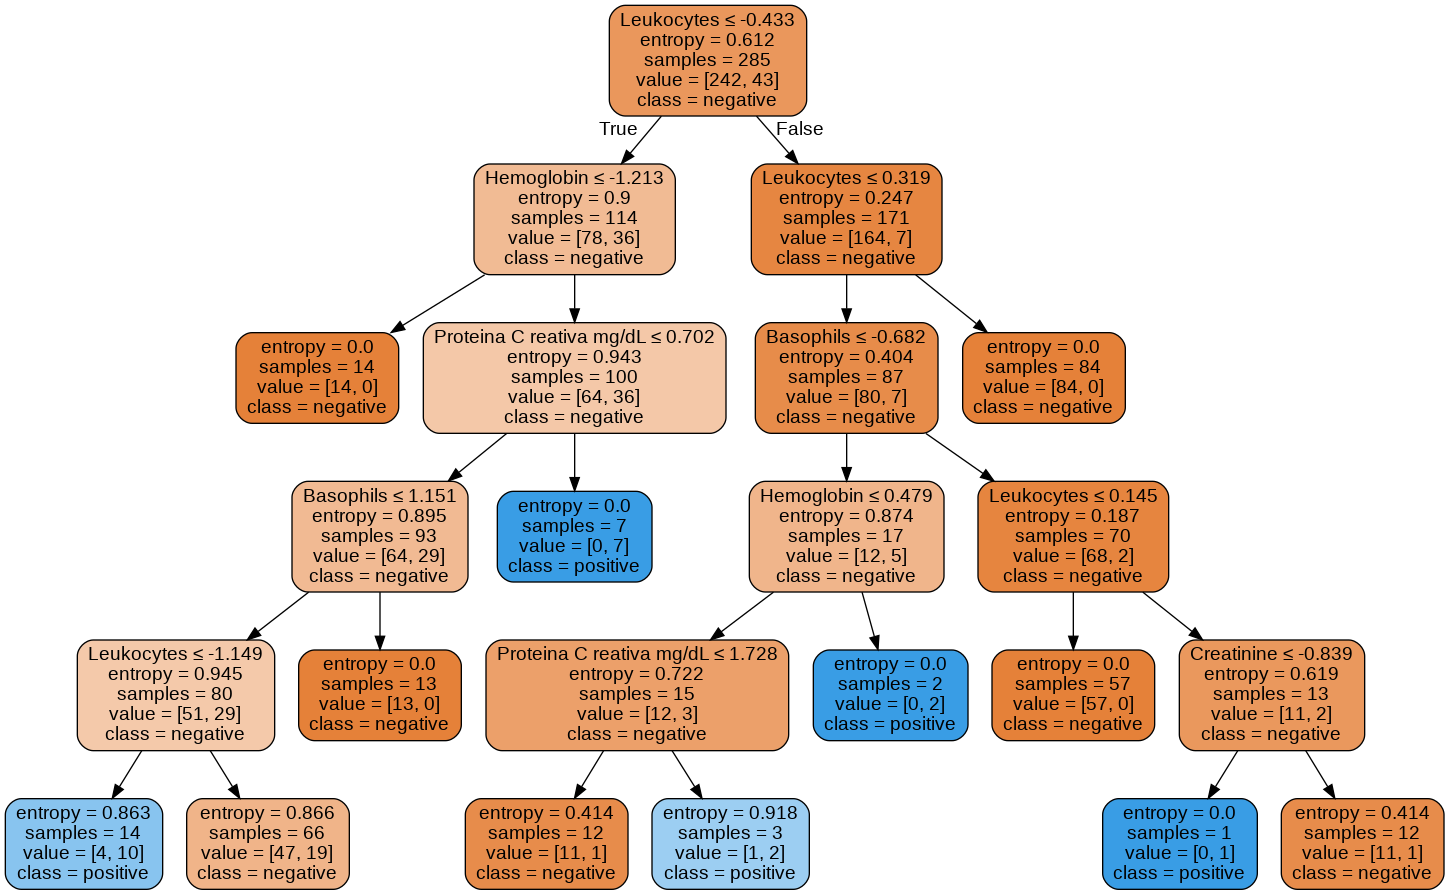

In [ ]:
nome_features = ['Leukocytes', 'Hemoglobin', 'Basophils', 'Creatinine', 'Proteina C reativa mg/dL']
nome_classes = modelo.classes_
dot_data = StringIO()
export_graphviz(modelo, out_file=dot_data, filled=True, feature_names=nome_features, class_names=nome_classes, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
graph.write_png("arvore.png")
Image('arvore.png')

Observando as medidas do modelo vamos que ele possui uma acurária muito boa porém ela não é a única fonte qualitativa. 
Com o classification_report fica claro que a precisão do modelo nao é tão confiavel assim.

**Precision**: Das classificações que o modelo fez quantas realmente foram corretas.

Ex precision = 1/3=0.33

Das 3 previsões só uma realmente foi correta

**Recall**: Significa razão de todas as amostras pela as previções corretas

Recall=1/4 = 0.25

Das 4 amostras da classe só uma o modelo preveu

**f1**: É média harmônica entre precisão e recall

Support: é o número de acorrencias na classe, existem 12 positivos e 60 negativos na classe

Como as amostras de positivos e negativos possuem uma relação muito distante entre si podemos constatar que esse modelo possue muitos faltos negativos, como se trata de um modelo puramente de teste a fim de exercitar os conhecimentos irei parar a analise por aqui. 

Obrigado.


In [ ]:
y_predicoes = modelo.predict(X_teste)
print("Acuracia da árvore", accuracy_score(Y_teste, y_predicoes))

Acuracia da árvore 0.8194444444444444


In [ ]:
print(classification_report(Y_teste, y_predicoes))

              precision    recall  f1-score   support

    negative       0.86      0.93      0.90        60
    positive       0.43      0.25      0.32        12

    accuracy                           0.82        72
   macro avg       0.65      0.59      0.61        72
weighted avg       0.79      0.82      0.80        72



In [ ]:
print(Y_teste)

['negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'positive' 'negative' 'negative' 'positive'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'positive' 'negative' 'negative' 'positive' 'positive' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'positive' 'positive'
 'positive' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'positive'
 'negative' 'positive' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'positive' 'negative']


In [ ]:
print(y_predicoes)

['negative' 'negative' 'negative' 'negative' 'positive' 'negative'
 'negative' 'negative' 'positive' 'negative' 'positive' 'positive'
 'negative' 'negative' 'positive' 'negative' 'positive' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'positive' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative'
 'negative' 'negative' 'negative' 'negative' 'negative' 'negative']
